# Benchmarks for `Cheby` on dense matrices (in-place)

In [1]:
using QuantumPropagators: Cheby

In [2]:
import QuantumPropagators
import CSV
import DataFrames
using Plots
using QuantumControl: run_or_load

In [3]:
using PropagationBenchmarks: run_benchmarks, params, Vary
using PropagationBenchmarks: calibrate_cheby
using PropagationBenchmarks: generate_trial_data, generate_timing_data
using PropagationBenchmarks: BenchmarkSeries
using PropagationBenchmarks: Units, plot_runtimes, plot_scaling, plot_overhead

In [4]:
projectdir(path...) = joinpath(@__DIR__, path...)
datadir(path...) = projectdir("data", "A01_01_Cheby_InPlace_Dense", path...)
mkpath(datadir())

"/home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense"

In [5]:
SYSTEMS_CACHE = Dict();
EXACT_SOLUTIONS_CACHE = Dict();
CALIBRATION_CACHE = Dict();

In [6]:
QuantumPropagators.disable_timings();

In [7]:
FORCE = (get(ENV, "FORCE", "0") in ["true", "1"])

false

## Runtime

In [8]:
PRECISION = Vary(1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-15);

In [9]:
SYSTEM_PARAMETERS = params(
    # see arguments of `random_dynamic_generator`
    N = Vary(1_000, 100, 10),
    spectral_envelope = 1.0,
    exact_spectral_envelope = true,
    number_of_controls = 1,
    density = 1,
    hermitian = true,
    dt = 1.0,
    nt = 1001,
);

In [10]:
EXACT_SOLUTION_PARAMETERS = params(method = Cheby, cheby_coeffs_limit = 1e-15,);

In [11]:
BENCHMARK_PARAMETERS = params(method = Cheby, precision = PRECISION,);

In [12]:
trial_data = run_or_load(datadir("benchmark_trials.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_trial_data,
        calibrate = calibrate_cheby,  # translate `precision` into `cheby_coeffs_limit`
        calibrated_keys_to_store = [:cheby_coeffs_limit],
        systems_cache = SYSTEMS_CACHE,
        calibration_cache = CALIBRATION_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

[ Info: Loading data from data/A01_01_Cheby_InPlace_Dense/benchmark_trials.jld2


In [13]:
QuantumPropagators.enable_timings();

timing_data = run_or_load(datadir("benchmark_timings.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_timing_data,
        calibrate = calibrate_cheby,
        calibrated_keys_to_store = [:cheby_coeffs_limit],
        systems_cache = SYSTEMS_CACHE,
        calibration_cache = CALIBRATION_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: Loading data from data/A01_01_Cheby_InPlace_Dense/benchmark_timings.jld2


In [14]:
runtime_data = merge(trial_data, timing_data)

Row,N,precision,cheby_coeffs_limit,init_prop,propagate,timesteps,matrix_vector_products,percent
1,1000,0.0001,1.0e-5,Trial(63.466 ms),Trial(8.668 s),1000,7000,98.8843
2,1000,1.0e-5,1.0e-6,Trial(63.133 ms),Trial(9.873 s),1000,8000,98.9261
3,1000,1.0e-6,1.0e-7,Trial(63.148 ms),Trial(11.101 s),1000,9000,98.9633
4,1000,1.0e-7,1.0e-7,Trial(63.228 ms),Trial(11.104 s),1000,9000,98.9196
5,1000,1.0e-8,1.0e-8,Trial(63.688 ms),Trial(12.437 s),1000,10000,98.9582
6,1000,1.0e-9,1.0e-10,Trial(64.396 ms),Trial(13.829 s),1000,11000,99.0042
7,1000,1.0e-10,1.0e-11,Trial(63.699 ms),Trial(14.887 s),1000,12000,98.9981
8,1000,1.0e-11,1.0e-11,Trial(62.819 ms),Trial(14.663 s),1000,12000,98.9545
9,1000,1.0e-12,1.0e-12,Trial(64.389 ms),Trial(16.273 s),1000,13000,99.022
10,1000,1.0e-15,missing,Trial(63.667 ms),Trial(16.096 s),1000,13000,99.2145


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_N=1000.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_N=100.csv


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense/cheby_inplace_dense_runtime_N=10.csv


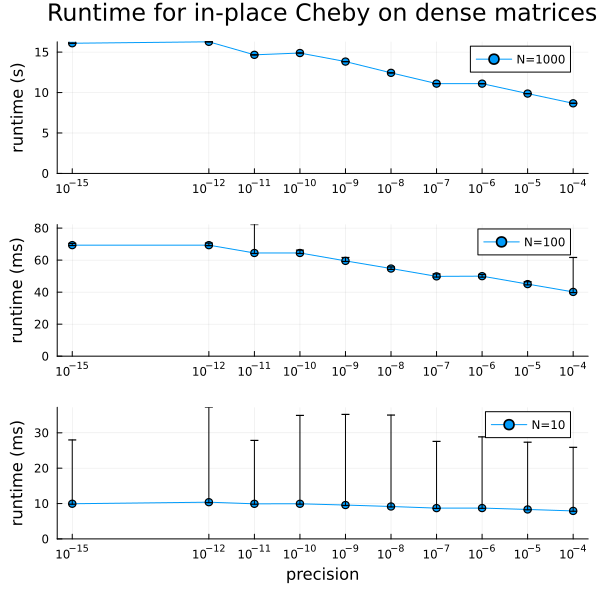

In [15]:
plot_runtimes(
    runtime_data,
    [1000, 100, 10];
    units = Dict(1000 => :s, 100 => :ms, 10 => :ms),
    size = (600, 600),
    plot_title = "Runtime for in-place Cheby on dense matrices",
    csv = datadir("cheby_inplace_dense_runtime_N={N}.csv"),
)

## Scaling

For larger system sizes, the runtime of the propagation should be dominated by matrix-vector products. The number of matrix_vector products should depend only on the desired precision and the spectral envelope of the system (for `dt=1.0`; or alternatively, on `dt` if the spectral envelope is kept constant). We analyze here how the number of matrix-vector products scales with the spectral envelope for the default "high" precision (machine precision), and for lower precision (roughtly half machine precision).

This scaling should be mostly independent of the size or the encoding of the system.

In [16]:
QuantumPropagators.enable_timings();

scaling_data = run_or_load(datadir("benchmark_scaling.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = 100,
            spectral_envelope = Vary(0.5, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0),
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        generate_exact_solution = (args...; kwargs...) -> nothing,
        benchmark_parameters = params(
            method = Cheby,
            cheby_coeffs_limit = Vary(1e-15, 1e-8)
        ),
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
        exact_solutions_cache = EXACT_SOLUTIONS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: Loading data from data/A01_01_Cheby_InPlace_Dense/benchmark_scaling.jld2


In [17]:
scaling_data

Row,spectral_envelope,cheby_coeffs_limit,timesteps,matrix_vector_products,percent
1,0.5,1.0e-15,1000,12000,67.1268
2,0.5,1.0e-8,1000,8000,65.0075
3,1.0,1.0e-15,1000,15000,67.9019
4,1.0,1.0e-8,1000,10000,66.473
5,5.0,1.0e-15,1000,26000,69.3028
6,5.0,1.0e-8,1000,18000,68.4654
7,10.0,1.0e-15,1000,36000,70.1566
8,10.0,1.0e-8,1000,27000,69.7436
9,15.0,1.0e-15,1000,45000,70.3944
10,15.0,1.0e-8,1000,34000,69.9808


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense/cheby_scaling_high.csv
[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense/cheby_scaling_low.csv


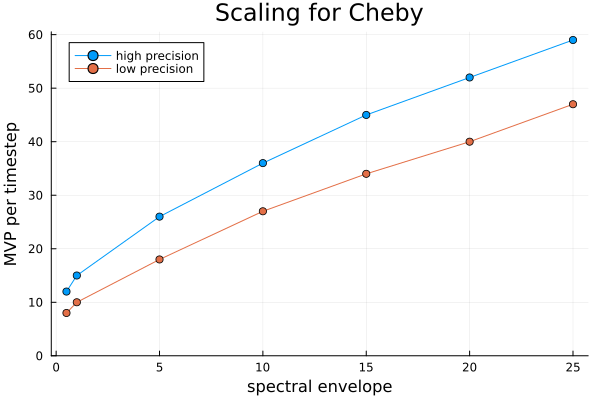

In [18]:
plot_scaling(
    scaling_data;
    plot_title = "Scaling for Cheby",
    csv = datadir("cheby_scaling_{highlow}.csv")
) do row
    if row[:cheby_coeffs_limit] == 1e-15
        return :high
    elseif row[:cheby_coeffs_limit] == 1e-8
        return :low
    else
        error("Unexpected `cheby_coeffs_limit`")
    end
end

## Overhead

For sufficiently large systems, the propagation should be dominated by matrix-vector products. Here, we analyze the "overhead", i.e., the percentage of the runtime _not_ spent in matrix-vector products, for smaller systems.

In [19]:
QuantumPropagators.enable_timings();

overhead_data = run_or_load(datadir("benchmark_overhead.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = Vary(5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
            spectral_envelope = 1.0,
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        exact_solution_parameters = EXACT_SOLUTION_PARAMETERS,
        generate_exact_solution = (args...; kwargs...) -> nothing,
        benchmark_parameters = params(method = Cheby),
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end

QuantumPropagators.disable_timings();

[ Info: Loading data from data/A01_01_Cheby_InPlace_Dense/benchmark_overhead.jld2


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/A01_01_Cheby_InPlace_Dense/cheby_inplace_dense_overhead.csv


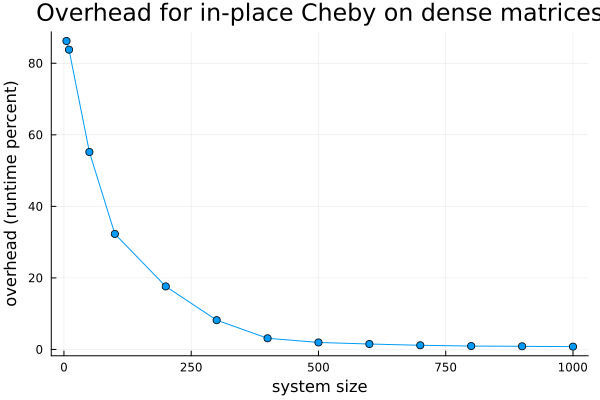

In [20]:
plot_overhead(
    overhead_data;
    csv = datadir("cheby_inplace_dense_overhead.csv"),
    plot_title = "Overhead for in-place Cheby on dense matrices",
)